####### How fraud cases are different from non-fraud cases?
####### Can we identify any feature which can explain/distinguish between two target classes?

In [1]:
### import files 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def read_data(path):
    '''This function imports comma seperated values file.
    Input: path - file location
    Output: dataframe object'''
    return pd.read_csv(path)

##dataframe object 
df = read_data('fraud dataset.csv')
print(df.shape)

(9999, 51)


In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### list of challeneges to this dataset?
    - few numerical features
    - lot of missing values
    - imbalanced dataset (0 ~3% ; 1~97%)
    - column description missing

In [4]:
## segregating numerical and categorical columns
categorical_features = df.select_dtypes(include = np.object).columns
numerical_features   = df.drop(['isFraud','TransactionID'],axis = 1).select_dtypes(include = np.number).columns

print(categorical_features)
print(numerical_features)

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')
Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15'], dtype='object')


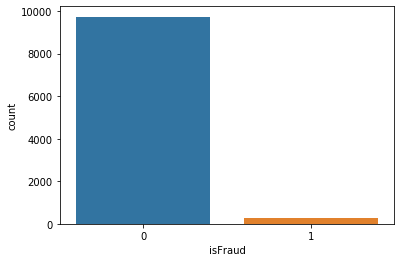

In [5]:
### target analysis - target variable is 'isFraud'
sns.countplot(df['isFraud'])

In [6]:
print("{}% of the data is having target class 1".format(round(len(df[df.isFraud==1])/len(df)*100),4))
print("{}% of the data is having target class 0".format(round(len(df[df.isFraud==0])/len(df)*100),4))

3% of the data is having target class 1
97% of the data is having target class 0


##### Missing values handling
    Guidelines
      - drop columns having missing values percentage >= 70 %
      - for columns < 70% missing values fill with one of the following approaches
          - median
          - mean if normally distributed
          - random values generated between 2 Standard deviation
          - or predict the missing values using a model

In [7]:
cnt_missing = df[numerical_features].isnull().sum()
per_missing = round(df[numerical_features].isnull().sum()/df.shape[0]*100,2)

_= pd.concat([pd.DataFrame(cnt_missing,columns = ['cntMissingValues']),
              pd.DataFrame(per_missing,columns=['perMissingValues'])], axis = 1)

_[_.perMissingValues>0].sort_values(['perMissingValues'], ascending = False)

,cntMissingValues,perMissingValues
D7,9776,97.77
D13,9719,97.20
dist2,9621,96.22
D12,9593,95.94
D14,9549,95.50
D6,9508,95.09
D8,8899,89.00
D9,8899,89.00
D11,7723,77.24
D5,7231,72.32


In [8]:
_[_.perMissingValues>70].sort_values(['perMissingValues'], ascending = False).index

Index(['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5'], dtype='object')

#### 
columns can be dropped:
    ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5']

In [9]:
## dropping above columns
col = ['D7', 'D13', 'dist2', 'D12', 'D14', 'D6', 'D8', 'D9', 'D11', 'D5']
df.drop(col,axis = 1, inplace = True)

In [10]:
_[(_.perMissingValues<70) & (_.perMissingValues>0)].sort_values(['perMissingValues'], ascending = False)

,cntMissingValues,perMissingValues
dist1,6614,66.15
D4,6230,62.31
D15,4930,49.30
D2,4576,45.76
D3,4272,42.72
D10,1265,12.65
addr2,913,9.13
card2,119,1.19
card5,22,0.22
card3,1,0.01


In [11]:
df[_[(_.perMissingValues<70) & (_.perMissingValues>0)].sort_values(['perMissingValues'], ascending = False).index].head()

,dist1,D4,D15,D2,D3,D10,addr2,card2,card5,card3
0,19.0,NaN,0.0,NaN,13.0,13.0,87.0,NaN,142.0,150.0
1,NaN,0.0,0.0,NaN,NaN,0.0,87.0,404.0,102.0,150.0
2,287.0,0.0,315.0,NaN,NaN,0.0,87.0,490.0,166.0,150.0
3,NaN,94.0,111.0,112.0,0.0,84.0,87.0,567.0,117.0,150.0
4,NaN,NaN,NaN,NaN,NaN,NaN,87.0,514.0,102.0,150.0


In [12]:
_[(_.perMissingValues<70) & (_.perMissingValues>0)].sort_values(['perMissingValues'], ascending = False).index

Index(['dist1', 'D4', 'D15', 'D2', 'D3', 'D10', 'addr2', 'card2', 'card5', 'card3'], dtype='object')

#### quick questions:
- should we include card details as features?
    - it depends. currently, filling them with a larger number indicating values are missing

In [13]:
cols = ['dist1', 'D4', 'D15', 'D2', 'D3', 'D10', 'addr2', 'card2', 'card5', 'card3']
df[cols] = df[cols].fillna(9999999)

In [14]:
df.head(1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,9999999.0,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,9999999.0,13.0,9999999.0,13.0,0.0,T,T,T,M2,F,T


###
1. card1,card2, card3, card4,card5,card6 -> get propertion of fraud cases
2. merge(card1,card2, card3, card4,card5)-> get propertion of fraud cases
3. merge(addr2	dist1	dist2) --> get propertion of fraud cases
4. P_emaildomain, R_emaildomain -> get propertion of fraud cases
5. Is there distinct TransactionAmt range for fraud case and none-fraud case?

In [15]:
# #1. 
# _ = pd.merge(df.groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card1'],how = 'inner')

# pd.merge(_,df[df.isFraud==0].groupby('card1')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),on = ['card1'],how = 'left')

In [16]:
# df.card6.isnull().sum() ## this missing values can be dropped

In [17]:
# #1. 
# _ = pd.merge(df.groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows'}),df[df.isFraud==1].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_1'}),on = ['card6'],how = 'inner')

# pd.merge(_,df[df.isFraud==0].groupby('card6')[['isFraud']].count().rename(columns = {'isFraud':'total_rows_0'}),
#         on = ['card6'],how = 'left')

##### quick note:
 - credit card transactions having relatively higher fraud cases

In [18]:
df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,9999999.0,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,9999999.0,13.0,9999999.0,13.0,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,9999999.0,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,315.0,T,T,T,M0,F,F


In [19]:
# ### fill
# df[['card1','card2','card3','card4','card5','card6']] = df[['card1','card2','card3','card4','card5','card6']].fillna(0)
# df.card1 = df.card1.astype('int')
# df.card2 = df.card2.astype('int')
# df.card3 = df.card3.astype('int')
# df.card5 = df.card5.astype('int')
# df['card_'] = df.card1.astype('str')+df.card2.astype('str')+df.card3.astype('str')+df.card4.astype('str')+df.card5.astype('str')+df.card6.astype('str')
# df.loc[:,['card1','card2','card3','card4','card5','card6','card_']]

In [20]:
# card1 -> headquarter
# card2 -> dept
# card3 -> brand(saving/)

In [21]:
# df.groupby(['card4','card6'])[['isFraud']].sum().reset_index()

Hypothese to be validated:
##### df[df.duplicated(subset=['card_'])].shape
 1. number of total rows for each card_
 2. number of fraud transactions
 3. number of non-fraud transactions
 4. TransactionAmt stats for the given card_
 5. For remaining unique card_ (9999-7881), find proper of each fraud classes

In [22]:
# df[df.duplicated(subset=['card_'])].head()

In [23]:
# df[df.duplicated(subset=['card_','isFraud'])].head()

In [24]:
# df[df.card_=='4663490150visa166debit'].isFraud.head()

In [25]:
# df[df.card_=='4663490150visa166debit'].head()

In [26]:
print('Total number of categorical features:{}'.format(df[categorical_features].shape[1]))
cnt_missing = df[categorical_features].isnull().sum()
per_missing = round(cnt_missing/df.shape[0]*100,2)

_= pd.concat([pd.DataFrame(cnt_missing,columns = ['cntMissingValues']),
              pd.DataFrame(per_missing,columns=['perMissingValues'])], axis = 1)

_[_.perMissingValues>0].sort_values(['perMissingValues'], ascending = False)

Total number of categorical features:11


,cntMissingValues,perMissingValues
R_emaildomain,8374,83.75
M5,5793,57.94
M1,5790,57.91
M2,5790,57.91
M3,5790,57.91
M4,4886,48.86
M6,2572,25.72
P_emaildomain,2105,21.05
card4,1,0.01
card6,1,0.01


In [27]:
# df[df.isFraud==1][df.M5.isnull()].shape[0]
_.index

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')

In [28]:
### filling missing values
df['card6'] = df['card6'].fillna('debit')
df['card4'] = df['card4'].fillna('visa')
df[['M1', 'M2', 'M3', 'M4', 'M5', 'M6']] = df[['M1', 'M2', 'M3', 'M4', 'M5', 'M6']].fillna('unknown')

In [29]:
### drop email ids:M1 has only 1 value remaining being 'NAN'
df.drop(['P_emaildomain','R_emaildomain'], axis = 1, inplace = True)

In [30]:
# sns.countplot(df.M6)

In [31]:
# df.isnull().sum()

#### TransactionAmt, TransactionDT Evaluation

In [32]:
# fig, ax = plt.subplots(1, 3, figsize=(20,4))

# amount_val = df['TransactionAmt'].values
# date_val = df['TransactionDT'].values

# sns.distplot(amount_val, ax=ax[0], color='r')
# ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
# ax[0].set_xlim([min(amount_val), max(amount_val)])

# sns.distplot(date_val, ax=ax[1], color='b')
# ax[1].set_title('Distribution of Transaction Time', fontsize=14)
# ax[1].set_xlim([min(date_val), max(date_val)])

# sns.scatterplot(date_val, amount_val, ax=ax[2], color='c')
# ax[2].set_title('Date vs. Amount', fontsize=14)

In [33]:
# fig, ax = plt.subplots(1, 2, figsize=(18,4))

# sns.countplot('ProductCD', data = df, ax=ax[0], color='r')
# ax[0].set_title('Distribution of ProductCD', fontsize=14)

# sns.countplot('ProductCD', ax=ax[1], data = df, color='b',hue='isFraud')
# ax[1].set_title('Distribution of ProductCD wrt. Target', fontsize=14)

In [34]:
# fig, ax = plt.subplots(2, 2, figsize=(18,10))

# sns.countplot('M1', data = df, ax=ax[0,0], color='g')
# sns.countplot('M6', data = df, ax=ax[0,0], color='y')
# ax[0,0].set_title('Distribution of M1', fontsize=12)

# sns.countplot('M2', data = df, ax=ax[0,1], color='r')
# ax[0,1].set_title('Distribution of M2', fontsize=12)

# sns.countplot('M3', data = df, ax=ax[1,0], color='b')
# ax[1,0].set_title('Distribution of M3', fontsize=12)

# sns.countplot('M4', ax=ax[1,1], data = df, color='y',hue='isFraud')
# ax[1,1].set_title('Distribution of M4', fontsize=12)

In [35]:
# s = sns.countplot('addr2', data = df, color='m')
# s.set_title('Distribution of address', fontsize=14)

In [36]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,9999999.0,150.0,discover,142.0,credit,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,9999999.0,13.0,9999999.0,13.0,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,9999999.0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,0.0,unknown,unknown,unknown,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,9999999.0,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,84.0,111.0,unknown,unknown,unknown,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,9999999.0,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,unknown,unknown,unknown,unknown,unknown,unknown


Text(0.5, 1.0, 'Distribution of Log(Power(TransactionAmt))')

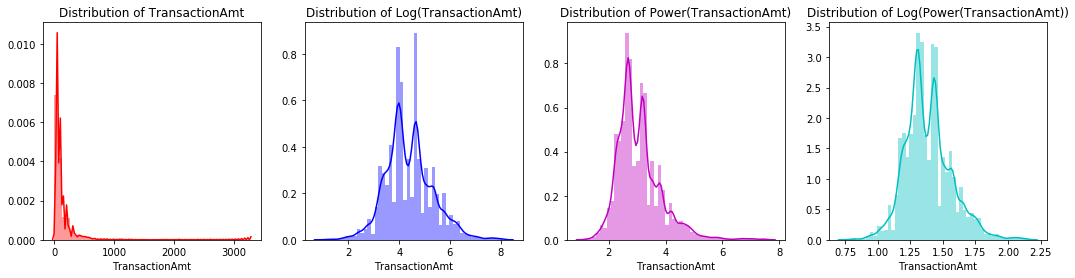

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

sns.distplot(df['TransactionAmt'], ax=ax[0], color='r')
ax[0].set_title('Distribution of TransactionAmt', fontsize=12)

sns.distplot(np.log1p(df['TransactionAmt']), ax=ax[1], color='b')
ax[1].set_title('Distribution of Log(TransactionAmt)', fontsize=12)

sns.distplot(np.power(df['TransactionAmt'],0.25),ax=ax[2],color='m')
ax[2].set_title('Distribution of Power(TransactionAmt)', fontsize=12)

sns.distplot(np.log1p(np.power(df['TransactionAmt'],0.25)),ax=ax[3],color='c')
ax[3].set_title('Distribution of Log(Power(TransactionAmt))', fontsize=12)

## log transformation alone is not working
## to reduce bimodal of the data, binning might work
## similary other variables/features need detail analysis and handling

In [38]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,9999999.0,150.0,discover,142.0,credit,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,9999999.0,13.0,9999999.0,13.0,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,9999999.0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,0.0,unknown,unknown,unknown,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,9999999.0,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,84.0,111.0,unknown,unknown,unknown,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,9999999.0,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,unknown,unknown,unknown,unknown,unknown,unknown


In [39]:
### TransactionAmt transformation & dummy encoding
df.TransactionAmt = np.log1p(np.power(df['TransactionAmt'],0.25))
df = pd.get_dummies(df)
print(df.shape)

(9999, 59)


In [52]:
# 'first','second','third' 
# 3,2,1
# 2,1,0

In [51]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr2,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D10,D15,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,M1_T,M1_unknown,M2_F,M2_T,M2_unknown,M3_F,M3_T,M3_unknown,M4_M0,M4_M1,M4_M2,M4_unknown,M5_F,M5_T,M5_unknown,M6_F,M6_T,M6_unknown
0,2987000,0,86400,1.355032,13926,9999999.0,150.0,142.0,87.0,19.0,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,9999999.0,13.0,9999999.0,13.0,0.0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
1,2987001,0,86401,1.200144,2755,404.0,150.0,102.0,87.0,9999999.0,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2,2987002,0,86469,1.327470,4663,490.0,150.0,166.0,87.0,287.0,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,9999999.0,9999999.0,0.0,0.0,315.0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
3,2987003,0,86499,1.297230,18132,567.0,150.0,117.0,87.0,9999999.0,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,84.0,111.0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0
4,2987004,0,86506,1.297230,4497,514.0,150.0,102.0,87.0,9999999.0,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,9999999.0,9999999.0,9999999.0,9999999.0,9999999.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [40]:
### Model building
# !pip install imblearn
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score,recall_score,accuracy_score, roc_auc_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [41]:
df.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D10', 'D15', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W', 'card4_american express', 'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_credit', 'card6_debit', 'M1_T', 'M1_unknown', 'M2_F', 'M2_T', 'M2_unknown', 'M3_F', 'M3_T', 'M3_unknown', 'M4_M0', 'M4_M1', 'M4_M2', 'M4_unknown', 'M5_F', 'M5_T', 'M5_unknown', 'M6_F', 'M6_T', 'M6_unknown'], dtype='object')

In [42]:
### normalising and spliting in to train and test sets
X = df.drop(['TransactionID','isFraud'], axis = 1)
y = df.isFraud

ss = StandardScaler().fit(X,y)
X_ = ss.transform(X)

X_train, X_test, y_train, y_test = tts(X_,y,test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7999, 57)
(2000, 57)
(7999,)
(2000,)


#### model1: base model with RandomOverSampler()

In [53]:
pipeline

Pipeline(memory=None,
         steps=[('over',
                 SMOTE(k_neighbors=7, n_jobs=None, random_state=None,
                       sampling_strategy=0.1)),
                ('under',
                 RandomUnderSampler(random_state=None, replacement=False,
                                    sampling_strategy=0.5)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_j

Validation set: confusion matrix with random-over-sampling


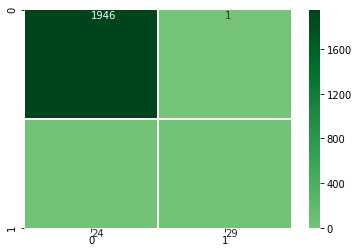

In [43]:
steps = [('over', RandomOverSampler()), ('model', RandomForestClassifier())] ### steps

pipeline = Pipeline(steps=steps) ### object

pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with random-over-sampling')
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(cm, annot=True, center = True,fmt="d",linewidths=0.5,cmap="Greens",vmin=0,vmax = cm.max(),annot_kws=annot_kws)


In [44]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 100.0
validation AUC Score: 77.3328


#### model2: base model with RandomUnderSampler()

Validation set: confusion matrix with Random-under-sampling


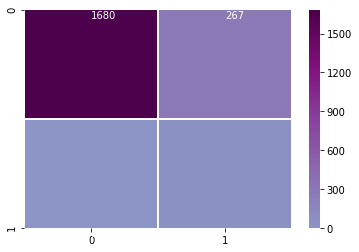

In [45]:
steps = [('under', RandomUnderSampler()), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with Random-under-sampling')
# confusion_matrix(y_test, y_hat, labels=[0,1])
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
sns.heatmap(cm, annot=True, center=False, fmt="d",linewidths=0.5,cmap="BuPu",vmin=0, vmax=cm.max(),annot_kws=annot_kws)

In [46]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 93.3864
validation AUC Score: 83.7093


#### model3: base model with SMOTE

In [55]:
# ### synthetic minority oversampling technique
# SMOTE(sampling_strategy = 0.5)

# 1
# 2
# 3
# 4

SMOTE(k_neighbors=5, n_jobs=None, random_state=None, sampling_strategy='auto')

Validation set: confusion matrix with SMOTE-over-sampling


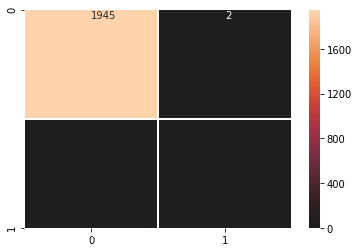

In [47]:
steps = [('over', SMOTE(random_state= 42)), ('model', RandomForestClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train) ## training

y_hat = pipeline.predict(X_test) ## prediction
print('Validation set: confusion matrix with SMOTE-over-sampling')
# confusion_matrix(y_test, y_hat, labels=[0,1])
cm = confusion_matrix(y_test, y_hat, labels=[0,1])
sns.heatmap(cm, annot=True, center=True, fmt="d",linewidths=0.5,vmin=0, vmax=cm.max(),annot_kws=annot_kws)


In [48]:
print('Training AUC Score: {}'.format(round(roc_auc_score(y_train, pipeline.predict(X_train))*100,4)))
print('validation AUC Score: {}'.format(round(roc_auc_score(y_test, y_hat)*100,4)))

Training AUC Score: 100.0
validation AUC Score: 75.4203


#### model3: tunning on 'K'

In [49]:
for k in range(4,10,1):
    steps = [('over', SMOTE(random_state=42, k_neighbors=k)), ('model', RandomForestClassifier())]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train, y_train) ## training
    y_hat = pipeline.predict(X_test) ## prediction
    print('validation set:AUC Score: {}%'.format(round(roc_auc_score(y_test, y_hat)*100,4)))
    print('Validation set: confusion matrix with SMOTE-over-sampling with k = {}'.format(k))
    print(confusion_matrix(y_test, y_hat, labels=[0,1]))


validation set:AUC Score: 75.4203%
Validation set: confusion matrix with SMOTE-over-sampling with k = 4
[[1945    2]
 [  26   27]]
validation set:AUC Score: 76.3637%
Validation set: confusion matrix with SMOTE-over-sampling with k = 5
[[1945    2]
 [  25   28]]
validation set:AUC Score: 74.4769%
Validation set: confusion matrix with SMOTE-over-sampling with k = 6
[[1945    2]
 [  27   26]]
validation set:AUC Score: 77.3071%
Validation set: confusion matrix with SMOTE-over-sampling with k = 7
[[1945    2]
 [  24   29]]
validation set:AUC Score: 76.3124%
Validation set: confusion matrix with SMOTE-over-sampling with k = 8
[[1943    4]
 [  25   28]]
validation set:AUC Score: 77.2814%
Validation set: confusion matrix with SMOTE-over-sampling with k = 9
[[1944    3]
 [  24   29]]


### grid search k value 
 - combining over-sampling and under-sampling
 - tunning k value in K_neighbours

In [50]:
# values to evaluate
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = RandomForestClassifier()
	over  = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = np.mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.890
> k=2, Mean ROC AUC: 0.888
> k=3, Mean ROC AUC: 0.889
> k=4, Mean ROC AUC: 0.890
> k=5, Mean ROC AUC: 0.889
> k=6, Mean ROC AUC: 0.886
> k=7, Mean ROC AUC: 0.889


In [59]:
# sum(y_train)

212

In [60]:
# y_train.shape

(7999,)

In [67]:
# 8000 (1->212) 

# 0.1*7787

In [69]:
# (7999-212)